요약 : 251124

크기변환 : cv2.resize

회전 : cv2.getRotationMatrix2D, cv2.warpAffine

아핀변환 : cv2.warpAffine

보간법 : INTER_NEAREST, INTER_LINEAR, INTER_LANCZOS4

원근변환 : cv2.getPerspectiveTransform, cv2.warpPerspective

이것만은 꼭 !!

- 평균 필터: 주변 픽셀들의 평균값 바꾸기
(가중치가 동일)
- 가우시안 필터: 조금 더 자연스럽게 흐릿하게 만들어 주는 필터
예)프로필 사진 배경 흐리게 하기
- 중간값 필터(median blur): 잡티제거(노이즈) 사용
- 양방향 필터: 경계선을 또렷하게 유지

sharpening / edge(경계, 윤곽선) detection
- 소벨(sobel) 필터 : 어디가 경계지?? 경계선을 찾아 주는 필터 (가로선, 세로선 따로 있는 경우 존재)
- 라플라시안 필터: 모든 방향의 경계선을 한번에 처리
- 캐니 엣지 필터: 가장 정밀한 필터(윤곽선만 쏙쏙 뽑아내는 필터) ex) 만화 필터


1. 라플라시안 정의
- 함수 값이 주변 값에 비해 얼마나 빠르게 변하는지 측정하기 위해 사용.
- 2차 미분(미분의 미분, 변화의 변화)

2. 1차 미분과 2차 미분 차이
- 1차 미분(derivative) : 기울기 (slope)
  - 방향(direction) / 변화량(magnitude) 알려줌
- 2차 미분: 곡률(curvature) 측정
  - 함수가 얼마나 휘어지는가?
  - 주변 평균보다 큰가? 작은가? 판단
  - min/max 또는 변곡점 탐지

회전

Cv2. getRotationMatrix2D(중심점, 각도, 크기)
- 중심점(사진 한 가운데) 기준, 각도만큼 회전해(돌려)

- 새 x 좌표(x') = 기존 x × cos(각도) - 기존 y × sin(각도)
- 새 y 좌표(y') = 기존 x × sin(각도) + 기존 y × cos(각도)

- cos 과 sin 이 왜 필요한가?
  - cos(각도) : 가로 방향으로 얼마나 이동할지
  - sin(강도) : 세로 방향으로 얼마나 이동할지

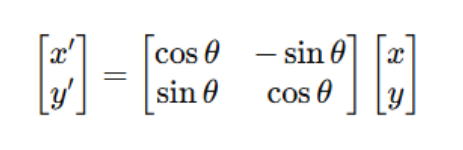

확대와 축소 (Scaling)

- 이미지(사진) 크게 만들거나 작게 만드는 것
- 예) 줌 인/아웃, 썸네일 만들기
- 어라? 문제가 발생하네... (확대)하니깐 빈 공간이 생기네. 왜냐하면 픽셀(pixel) 고정된 정해진 수니깐

- 해결방법 (보간법, 간격을 보충해 줘야지)
  - nearest: 가장 가까운 픽셀 값 복사
    (단점: 계단 현상 발생, but 가장 많이 사용)
  - linear: 주변 픽셀들의 평균
  - cubic : 더 부드럽게

- 새 x = 기존 x × sx (sx > 1이면 확대, 0 < sx < 1이면 축소)
- 새 y = 기존 y × sy

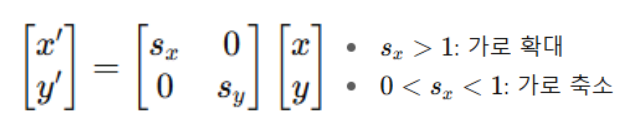

아핀 변환

- Cv2.getAffineTransform(점1, 점2), 3개의 점으로 변환을 지정함
- 직선은 직선으로 유지, 평행선은 계속 평행하게 유지

- 새 x = a₁₁×x + a₁₂×y + tx
- 새 y = a₂₁×x + a₂₂×y +

- a : 회전, 확대, 기울임
- t : 이동

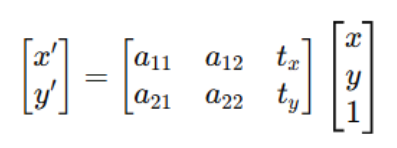

자유도 (degree of freedom)

- 기준(default) 6dof
- 위치이동 3가지(translation): 앞뒤(surge), 좌우(sway), 위아래(heave) - x, y, z 축
- 회전이동 3가지(rotation) 끄덕끄덕(pitch), 도리도리(yaw), 갸욱갸욱(roll) - x, y, z축 회전

- 객체(물체) 공간 안에서 얼마나 자유롭게 움직이느냐 또는 상태가 변하냐(변경 가능)
- 독립적으로 제어가능한 움직임 수


외웁시다.
제목 : 자유도 (dof)
- 앞뒤 끄덕끄덕, 좌우 도리도리, 위아래 갸욱갸욱


c.f) 평면(2D)상 자유도: 3 dof
- 왜냐하면요. Z축이 없자나요.

- 앞뒤 (X축) :(평면) 전진, 후진
- 좌우이동(Y축) : (평면) 왼쪽, 오른쪽
- 평면회전(Yaw) : 제자리 돌기

Perspective 변환(원근변환)
- (***) 직선은 직선으로 유지
- 평행선은 한 점(소실점)에서 만남

- 예)
  - 비스듬하게 찍은 사진 >> 정면으로 보이게
  - 물체(객체)를 원근감 있게(가까운 것 크게, 먼 것은 작게)    
- 원본 사진에서 4개의 점 선택(사각형 모서리)
- 이 점들을 어디로 옮길지 결정


Cv2.getPerspectiveTransform(p1, p2)

p1: 원본 4개 점
p2: 목표 4개 점

- 새 x = (h₁₁×x + h₁₂×y + h₁₃) / (h₃₁×x + h₃₂×y + h₃₃)
- 새 y = (h₂₁×x + h₂₂×y + h₂₃) / (h₃₁×x + h₃₂×y + h₃₃)

- 멀수록 분모가 커지고 나눈 값이 작아짐 >> 작게 보임
- 가까우면 분모가 작아지고 나눈 값이 커짐>> 크게 보임

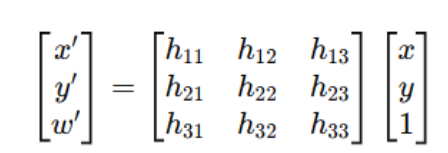

정리의 시간: Affine (아핀) vs Perspective(원근)

1) 필요한 점
- 아핀: 3개 / 원근: 4개
2) 평행선
- 아핀: 평행 유지 / 원근 : 평행 깨짐(소실점-한점)
3) 사각형 형태
- 아핀: 평행사변형 / 원근: 사다리꼴


정리합시다.
1. 확대 / 축소
- sx, sy >> 곱하기만 >> 크기가 변한다
2. 회전
- 코가 사세 >> sin(세로), cos(가로)>> 각도만 변함
3. 아핀
- a(회전, 기울기), t(이동) 곱하고 더하기 >> 직선, 평행선 유지
4. 원근
- 나누기 추가 >> 평행선 깨짐(원근감 표현)



1. 선형 변환 (곱하기, 더하기만)
- 새로운 좌표 = 행렬(a) * 원래 좌표 + 이동(t)
  - 직선은 직선, 평행선은 평행

2. 비선형 변환 (나누기 포함)
- 새로운 좌표 = (행렬*원래 좌표) / 거리계수
  - 원근감 표현


In [55]:
%pwd

'/content'

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


# image_path = '/content/wafer.jpg'
image_path = '/content/drive/MyDrive/강의_4차_AI_Computer_Vision_응용_251120/강의_6기_AI응용_2차시_OpenCV_기하학적 변환/dog.jpg'

In [57]:
image_path

'/content/drive/MyDrive/강의_4차_AI_Computer_Vision_응용_251120/강의_6기_AI응용_2차시_OpenCV_기하학적 변환/dog.jpg'

In [58]:
# 이미지 사이즈
image = cv2.imread(image_path)
# image.shape

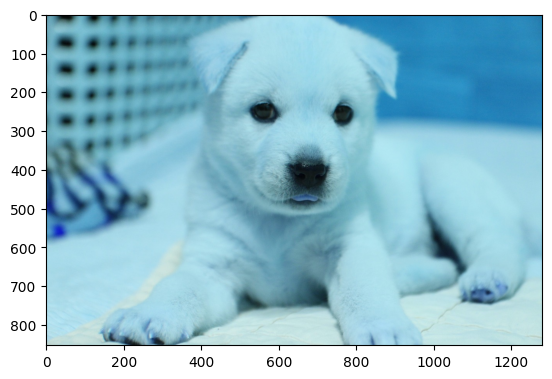

In [59]:
plt.imshow(image)

In [60]:
src = image.copy()

In [61]:
src[:,:]

array([[[ 83, 134, 144],
        [ 86, 137, 147],
        [ 89, 141, 153],
        ...,
        [ 40, 122, 170],
        [ 41, 120, 171],
        [ 38, 117, 168]],

       [[ 83, 134, 144],
        [ 86, 137, 147],
        [ 90, 142, 154],
        ...,
        [ 41, 123, 171],
        [ 40, 119, 170],
        [ 37, 116, 167]],

       [[ 81, 133, 145],
        [ 85, 137, 149],
        [ 90, 142, 155],
        ...,
        [ 36, 120, 168],
        [ 38, 119, 170],
        [ 37, 118, 169]],

       ...,

       [[190, 212, 210],
        [191, 213, 211],
        [193, 215, 213],
        ...,
        [191, 224, 220],
        [191, 224, 220],
        [192, 225, 221]],

       [[188, 210, 208],
        [189, 211, 209],
        [192, 214, 212],
        ...,
        [192, 225, 221],
        [192, 225, 221],
        [192, 225, 221]],

       [[187, 209, 207],
        [189, 211, 209],
        [190, 212, 210],
        ...,
        [192, 225, 221],
        [192, 225, 221],
        [193, 226, 222]]

array([[[ 75, 137, 155],
        [ 74, 136, 154],
        [ 73, 135, 153],
        ...,
        [ 83, 147, 165],
        [ 82, 146, 164],
        [ 82, 146, 164]],

       [[ 72, 134, 152],
        [ 71, 133, 151],
        [ 70, 132, 150],
        ...,
        [ 85, 149, 167],
        [ 85, 149, 167],
        [ 86, 150, 168]],

       [[ 71, 130, 149],
        [ 70, 129, 148],
        [ 70, 129, 149],
        ...,
        [ 87, 151, 169],
        [ 88, 152, 170],
        [ 90, 154, 172]],

       ...,

       [[148, 201, 222],
        [149, 202, 223],
        [150, 203, 224],
        ...,
        [128, 192, 217],
        [127, 191, 215],
        [127, 191, 215]],

       [[150, 203, 224],
        [151, 204, 225],
        [152, 205, 226],
        ...,
        [127, 191, 216],
        [127, 191, 215],
        [127, 191, 215]],

       [[152, 205, 226],
        [152, 205, 226],
        [153, 206, 227],
        ...,
        [127, 191, 216],
        [127, 191, 215],
        [127, 191, 215]]], dtype=uint8)
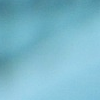

In [62]:
# 추출
src[250:350, 250:350]

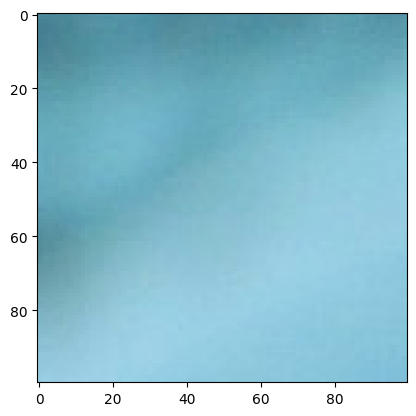

In [63]:
dst = src[250:350, 250:350]
plt.imshow(dst)

이미지 크기 변환

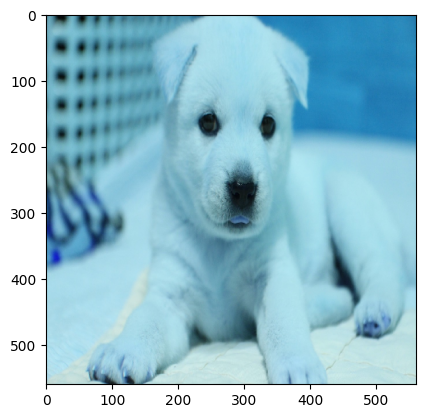

In [64]:
# openCV 크기 변환 resize()
# 보간(확대, 축소) >> 빈 값(픽셀)을 어떻게 할 것인가?
dst = cv2.resize(src, dsize=(560,560), interpolation=cv2.INTER_NEAREST)
# interpolation 보간
plt.imshow(dst)

이미지 회전

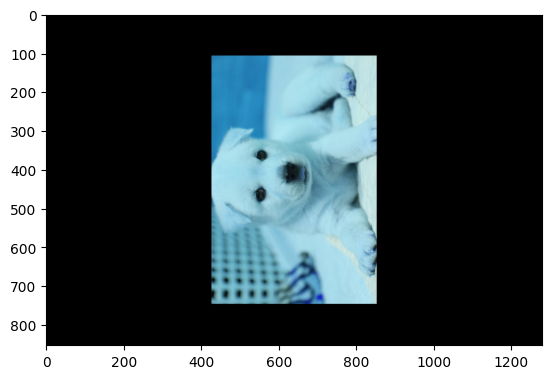

In [65]:
# 중심점 기준 회전 >> 중심픽셀 필요
import cv2

src = cv2.imread(image_path)
height, width, _ = src.shape # 채널 미사용

center = (width/2, height/2)

# 회전 각도와 스케일
angle = 90
scale = 0.5

# 기하학적 변환 : 이미지 * 행렬 결과
# getRotationMatrix2DM >> 원본에 곱할 행렬 만들기
# warpAffine(원본 이미지, 곱할 행렬, (너비, 높이))

matrix = cv2.getRotationMatrix2D(center, angle, scale)
dst = cv2.warpAffine(src, matrix, (width, height))

plt.imshow(dst)

In [66]:
src = cv2.imread(image_path)

# x축 방향 여유공간 비율(원본 너비 30% 추가)
mx = 0.3

#a : x축 늘리기(1>x 면 줄어들고, x>1면 늘어남)
#b : 수평 기울이기(x) - shear
#c : 수직 기울이기(y) - shear
#d : y축 늘리기

# [a, b, t1], a, b, c, d  -> 회전, 크기조절, 기울기
# [c, d, t2] t1(x), t2(y) = 이동

affine_mat = np.array([[1, 0, 100], [0, 1, 100]]).astype(np.float32)

affine_mat
# array([[  1.,   0., 100.], [  0.,   1., 100.]], dtype=float32)
# 결과해석 [기울기 유지, 크기변화 없다. 100픽셀 이동]

array([[  1.,   0., 100.],
       [  0.,   1., 100.]], dtype=float32)

In [67]:
src.shape

(853, 1280, 3)

In [68]:
my = 0.3
cv2.warpAffine(src, affine_mat, (int(width+width*mx), int(height+height*my)))

# width*mx : 원래너비(500), 여유공간 150(mx=0.3 30%) = 650
# height 그대로

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [69]:
cv2.warpAffine(src, affine_mat, (int(2*width), int(2*height)))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

보간법

In [70]:
image_path = '/content/drive/MyDrive/강의_4차_AI_Computer_Vision_응용_251120/강의_6기_AI응용_2차시_OpenCV_기하학적 변환/dog.jpg'

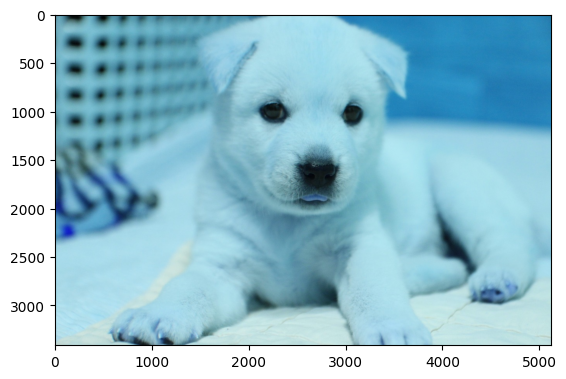

In [71]:
src = cv2.imread(image_path)

dst1 = cv2.resize(src, (0,0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
# dsize=(0,0) (너비, 높이) 절대크기 지정(무시)
# fx=4 x축 4배 확대
# fy=4 y축 4배 확대
# >> (0,0) 이면, x축 4배, y축 4배 확대
plt.imshow(dst1)

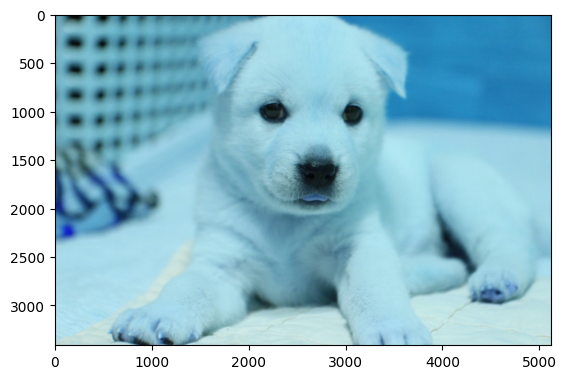

In [72]:
src = cv2.imread(image_path)

# cv2.INTER_LINEAR
dst2 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_LINEAR) # 너비, 높이. 새롭게 만들어질 이미지(dsize)의 크기. 레졸루션
# >> 순서 중요 (가로 픽셀수, 세로 픽셀수) (아주 정밀)
plt.imshow(dst2)

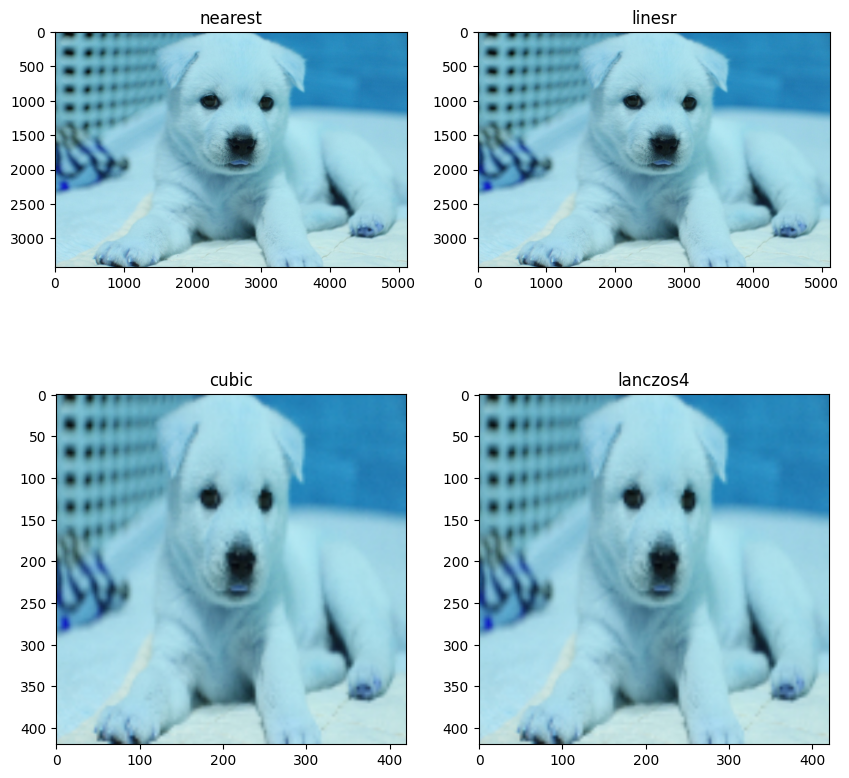

In [79]:
# cv2.INTER_CUBIC
# 4*4 아웃픽셀을 사용하여 빈 곳 보간
dst3 = cv2.resize(src, (420,420), cv2.INTER_CUBIC)
# plt.imshow(dst3)

# cv2.INTER_LANCZOS4
# 8*8 아웃픽셀 사용하여 빈 곳 보간
dst4 = cv2.resize(src, (420,420), cv2.INTER_LANCZOS4)
# plt.imshow(dst4)

# images = [dst1[10:400, 100: 400],
#           dst2[10:400, 100: 400],
#           dst3[10:400, 100: 400],
#           dst4[10:400, 100: 400]]
images = [dst1, dst2, dst3, dst4]
names = ['nearest', 'linesr', 'cubic', 'lanczos4']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
k = 0
for i in range(2):
    for j in range(2):
        axes[i,j].imshow(images[k])
        axes[i,j].set_title(f'{names[k]}')
        k+=1

# >> 갈수록 정밀하게 계산

In [74]:
src = cv2.imread(image_path)
src = cv2.resize(src, (128,128))
src.shape

(128, 128, 3)

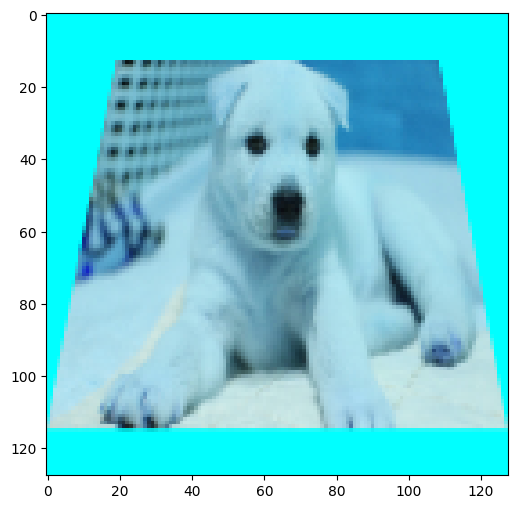

In [75]:
src = cv2.imread(image_path)
src = cv2.resize(src, (128,128))
height, width, _ = src.shape

src_pts = np.array([[0.0, 0.0], [width, 0.0], [width, height], [0.0, height]], dtype=np.float32)
# 이미지가 전체적으로 보이면서 적절한 원근감을 주기 위해 dst_pts를 조정
dst_pts = np.array([[width * 0.15, height * 0.1], [width * 0.85, height * 0.1],
                    [width, height * 0.9], [0, height * 0.9]], dtype=np.float32)

M = cv2.getPerspectiveTransform(src_pts, dst_pts)
dst = cv2.warpPerspective(src, M, (width, height), borderValue=(0,255,255))

plt.figure(figsize=(6,6))
plt.imshow(dst)